In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. LOAD DATA ---
print("Loading Fashion-MNIST dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- 2. PREPROCESSING ---
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (28, 28, 1) -> The '1' stands for grayscale channel
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print(f"Training Data Shape: {X_train.shape}")

# --- 3. BUILD CNN MODEL ---
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block (Extracts deeper features)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Classify
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

# --- 4. COMPILE AND TRAIN ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nStarting Training...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# --- 5. EVALUATION ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix: Fashion Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Loading Fashion-MNIST dataset...
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Data Shape: (60000, 28, 28, 1)

Starting Training...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.7533 - loss: 0.6859 - val_accuracy: 0.8744 - val_loss: 0.3462
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.8772 - loss: 0.3455 - val_accuracy: 0.8857 - val_loss: 0.3177
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.8909 - loss: 0.2980 - val_accuracy: 0.8979 - val_loss: 0.2781
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9059 - loss: 0.2577 - val_accuracy: 0.9006 - val_loss: 0.2692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9139 - loss: 0.2309 - val_accuracy: 0.9039 - val_loss: 0.2594
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9209 - loss: 0.2105 - val_accuracy: 0.9112 - val_loss: 0.2496
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9279 - loss: 0.1912 - val_accuracy: 0.9140 - val_loss: 0.2395
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9345 -

Loading Fashion-MNIST dataset...
Training Data Shape: (60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Starting Training...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.7490 - loss: 0.6975 - val_accuracy: 0.8620 - val_loss: 0.3796
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.8716 - loss: 0.3568 - val_accuracy: 0.8820 - val_loss: 0.3149
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.8898 - loss: 0.2968 - val_accuracy: 0.8909 - val_loss: 0.2938
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9042 - loss: 0.2649 - val_accuracy: 0.8974 - val_loss: 0.2708
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9111 - loss: 0.2403 - val_accuracy: 0.9045 - val_loss: 0.2540
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9184 - loss: 0.2196 - val_accuracy: 0.9086 - val_loss: 0.2533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9242 - loss: 0.2011 - val_accuracy: 0.9067 - val_loss: 0.2704
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/ste

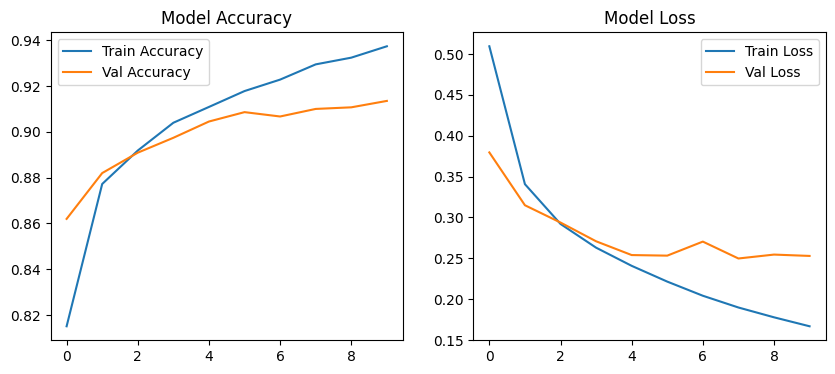

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


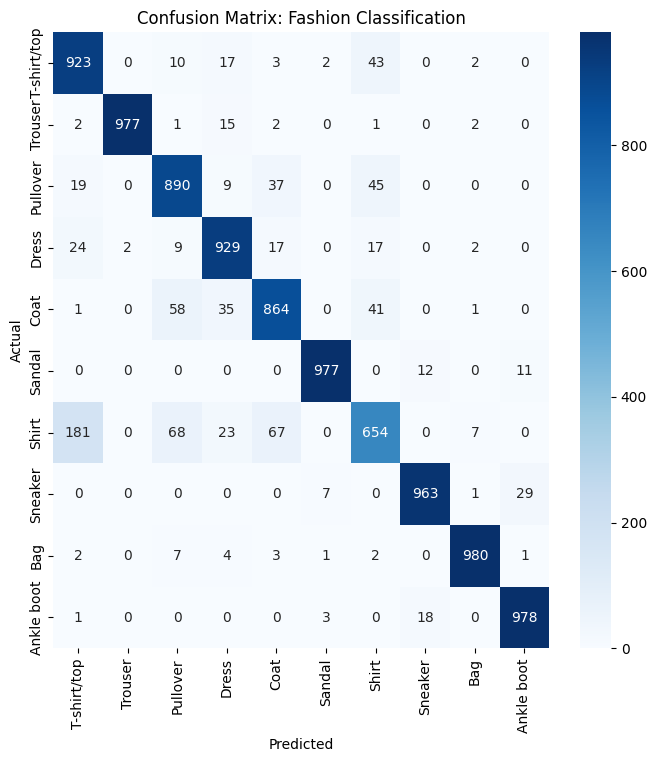

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. LOAD DATA ---
print("Loading Fashion-MNIST dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- 2. PREPROCESSING ---
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (28, 28, 1) -> The '1' stands for grayscale channel
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print(f"Training Data Shape: {X_train.shape}")

# --- 3. BUILD CNN MODEL ---
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block (Extracts deeper features)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Classify
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

# --- 4. COMPILE AND TRAIN ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nStarting Training...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# --- 5. EVALUATION ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix: Fashion Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Loading Fashion-MNIST dataset...
Training Data Shape: (60000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Starting Training...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 36ms/step - accuracy: 0.7539 - loss: 0.6778 - val_accuracy: 0.8700 - val_loss: 0.3557
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.8737 - loss: 0.3446 - val_accuracy: 0.8875 - val_loss: 0.3104
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.8899 - loss: 0.2950 - val_accuracy: 0.8941 - val_loss: 0.2828
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9043 - loss: 0.2583 - val_accuracy: 0.8991 - val_loss: 0.2676
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9134 - loss: 0.2343 - val_accuracy: 0.9061 - val_loss: 0.2542
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9209 - loss: 0.2138 - val_accuracy: 0.9061 - val_loss: 0.2563
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9278 - loss: 0.1975 - val_accuracy: 0.9104 - val_loss: 0.2402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/ste

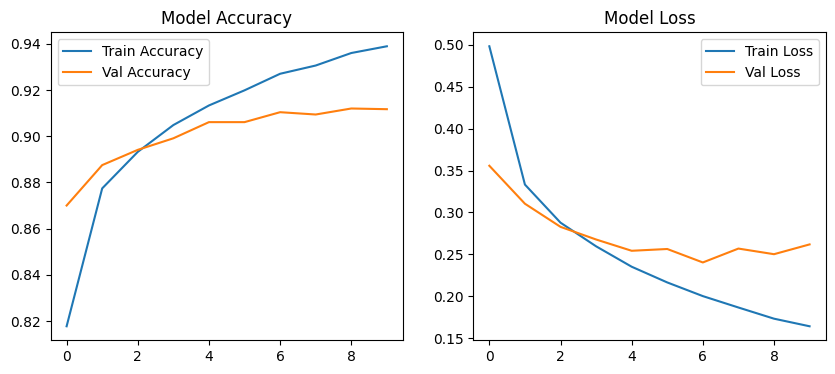

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


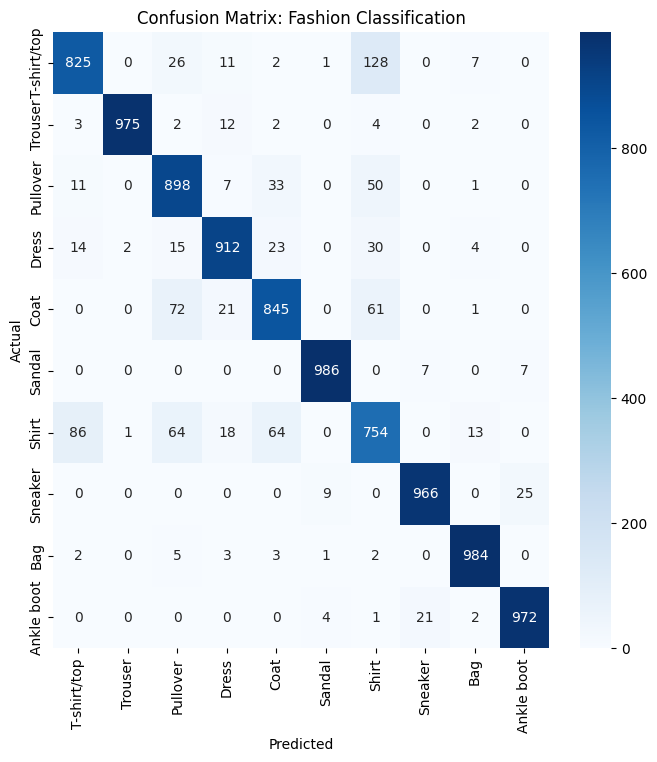

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# --- 1. LOAD DATA ---
print("Loading Fashion-MNIST dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Class names for visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --- 2. PREPROCESSING ---
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (28, 28, 1) -> The '1' stands for grayscale channel
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

print(f"Training Data Shape: {X_train.shape}")

# --- 3. BUILD CNN MODEL ---
model = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block (Extracts deeper features)
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Classify
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax') # Output layer (10 classes)
])

# --- 4. COMPILE AND TRAIN ---
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nStarting Training...")
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# --- 5. EVALUATION ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Plot Training History
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix: Fashion Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()